# 1. 데이터 불러오기

In [24]:
import pandas as pd

secom_data = pd.read_csv('default of credit card clients2.csv', sep = ',')
data = secom_data.copy()
secom_labels = pd.read_csv('data.csv')
label = secom_labels.copy()

In [25]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,0,0,0,0,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,0,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,0,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [26]:
label

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


# 2. 데이터 전처리

# 3. 특징 선택

# 4. 데이터 불균형 해소

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size = 0.2, random_state = 0)

In [29]:
# SMOTE를 활용한 Oversampling

!pip install imblearn
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state = 0)
data_over, label_over = smote.fit_resample(X_train, Y_train)
label_over.value_counts()

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (D:\anaconda\lib\site-packages\sklearn\metrics\__init__.py)

# 5. 데이터 분류

In [8]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(bootstrap=True)
RFC.fit(data_over, label_over)

RandomForestClassifier()

# 6. 성능 평가

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       490
           1       0.21      0.25      0.23        28

    accuracy                           0.91       518
   macro avg       0.58      0.60      0.59       518
weighted avg       0.92      0.91      0.91       518

교차 검증 점수: 0.9439
AUC 점수: 0.5974
F1-Score: 0.5883


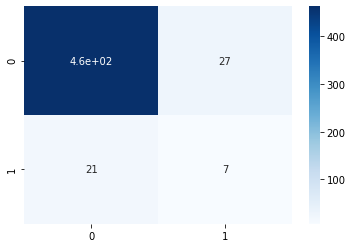

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns

pred_data = RFC.predict(X_test)

kf = KFold(n_splits=10)
cm = pd.DataFrame(confusion_matrix(Y_test, pred_data))
sns.heatmap(cm, annot=True, cmap='Blues')
print(classification_report(Y_test, pred_data))
print("교차 검증 점수: {:.4f}".format(cross_val_score(RFC, X_test, Y_test, cv=kf).mean()))
print("AUC 점수: {:.4f}".format(roc_auc_score(Y_test, pred_data)))
print("F1-Score: {:.4f}".format(f1_score(pred_data, Y_test)))